## unsupervised learning-kmeans clustering

### task-2 implementation of clustering species in iris dataset

In [3]:
#importing the required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#importing the data using pandas
df=pd.read_csv("iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.describe()
#knowing the data well

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isna().sum()
#finding for null values
#the data is good to go

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

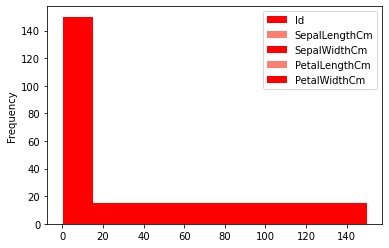

In [34]:
df.plot(kind="hist",color={"salmon","red"});
#predicting the range of the data

In [8]:
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [21]:
x = df.iloc[:, [1, 2, 3, 4]].values

In [22]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

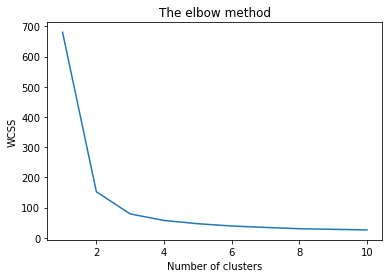

In [23]:
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

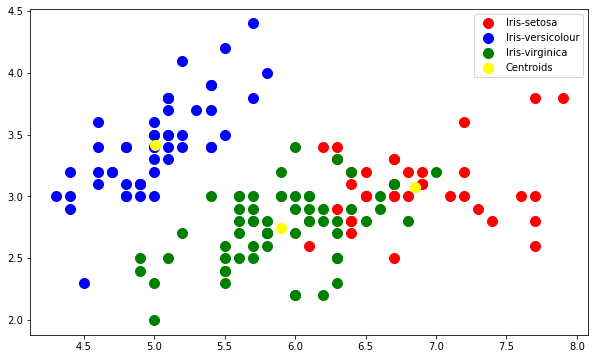

In [31]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

#Visualising the clusters
fig=plt.subplots(figsize=(10,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend();


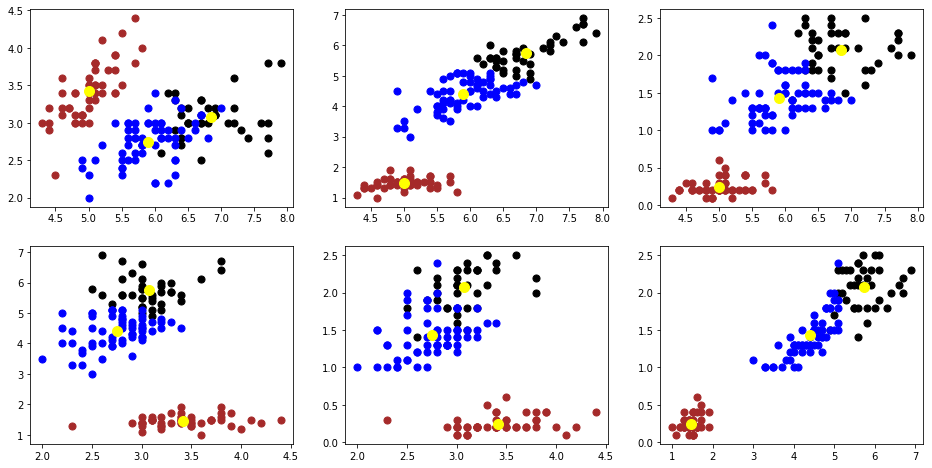

In [44]:
#the other predictions of kmeans clustering during prediction
fig, ax = plt.subplots(2, 3, figsize = (16, 8))
a = 0
b = 0
for i in range(0, 4):
    for j in range(i+1, 4):
        if a < 3:
            ax[0, a].scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 50, c = 'black', label = 'Iris-setosa')
            ax[0, a].scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j],s = 50, c = 'brown', label = 'Iris-versicolour')
            ax[0, a].scatter(x[y_kmeans == 2, i], x[y_kmeans == 2, j],s = 50, c = 'blue', label = 'Iris-verginica')
            ax[0, a].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], s = 100, c = 'yellow', label = 'Centroids', marker = "o")
            a = a + 1
        elif b < 3:
            ax[1, b].scatter(x[y_kmeans == 0, i], x[y_kmeans == 0, j], s = 50, c = 'black', label = 'Iris-setosa')
            ax[1, b].scatter(x[y_kmeans == 1, i], x[y_kmeans == 1, j],s = 50, c = 'brown', label = 'Iris-versicolour')
            ax[1, b].scatter(x[y_kmeans == 2, i], x[y_kmeans == 2, j],s = 50, c = 'blue', label = 'Iris-verginica')
            ax[1, b].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:,j], s = 100, c = 'yellow', label = 'Centroids', marker = "o")
            b = b + 1

axs[0, 0].set_title('Sepal Length vs. Sepal Width')
axs[0, 1].set_title('Sepal Length vs. Petal Length')
axs[0, 2].set_title('Sepal Length vs. Petal Width')
axs[1, 0].set_title('Sepal Width vs. Petal Length')
axs[1, 1].set_title('Sepal Width vs. Petal Width')
axs[1, 2].set_title('Petal Length vs. Petal Width');

## Done by savitha
regards the sparks foundation